# PART1 DATA EXPLORATION

## Imports

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
from enum import Enum
from pathlib import Path

## Load Data

In [2]:
data_dir = Path('../data')

In [3]:
data_path = data_dir / 'Dataset1.csv'
df = pd.read_csv(data_path)

## Explore the data

In [4]:
df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1
881,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2
882,264,10.3,475,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0
883,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 96.9+ KB


In [6]:
def check_weird_values(data):
    for col in data.columns:
        try:
            data[col] = data[col].astype(float)
        except ValueError as err:
            print(f'could not convert data on column "{col}" with error {err}')

In [7]:
check_weird_values(df)

could not convert data on column "P" with error could not convert string to float: '?'


In [8]:
def check_duplicated(data: pd.DataFrame):
    if num_duplicated := sum(data.duplicated()):
        print(f'df has {num_duplicated} duplicated rows')
    else:
        print('data frame has no duplicated rows')

In [9]:
check_duplicated(df)

df has 3 duplicated rows


In [10]:
# Check for empty values
print("\nNumber of empty values in each column:")
print(df.isnull().sum())


Number of empty values in each column:
N            0
P            0
K            0
pH           0
EC           0
OC           1
S            0
Zn           0
Fe           0
Cu           1
Mn           0
B            0
OM           0
Fertility    0
dtype: int64


# Data Cleaning

In [11]:
def remove_rows_with_errors(input_df: pd.DataFrame) -> pd.DataFrame:
    error_rows = []

    for col in input_df.columns:
        try:
            input_df[col] = input_df[col].astype(float)
        except ValueError as e:
            print(f'could not convert data on column "{col}" with error {e}')
            error_rows.extend(input_df[col][pd.to_numeric(input_df[col], errors='coerce').isna()].index.tolist())

    error_rows = np.unique(error_rows)
    df_cleaned = df.drop(index=error_rows)
    print(f'removed rows are : {error_rows}')

    return df_cleaned

In [12]:
def remove_duplicates_from_dataframe(input_df: pd.DataFrame) -> pd.DataFrame:
    seen_rows = set()
    output_rows = []

    for index, row in input_df.iterrows():
        row_tuple = tuple(row)
        if row_tuple not in seen_rows:
            seen_rows.add(row_tuple)
            output_rows.append(row)

    output_df = pd.DataFrame(output_rows, columns=input_df.columns)
    return output_df

In [13]:
def remove_rows_with_missing_values(input_df: pd.DataFrame) -> pd.DataFrame:
    output_df = input_df[~input_df.isna().any(axis=1)]
    return output_df

In [14]:
def clean_df(input_df: pd.DataFrame) -> pd.DataFrame:
    input_df = remove_rows_with_errors(input_df)
    input_df = remove_duplicates_from_dataframe(input_df)
    input_df = remove_rows_with_missing_values(input_df)
    return input_df

In [15]:
df = clean_df(df)

could not convert data on column "P" with error could not convert string to float: '?'
removed rows are : [16 34]


In [16]:
check_duplicated(df)
check_weird_values(df)

data frame has no duplicated rows


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 882
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          878 non-null    float64
 1   P          878 non-null    float64
 2   K          878 non-null    float64
 3   pH         878 non-null    float64
 4   EC         878 non-null    float64
 5   OC         878 non-null    float64
 6   S          878 non-null    float64
 7   Zn         878 non-null    float64
 8   Fe         878 non-null    float64
 9   Cu         878 non-null    float64
 10  Mn         878 non-null    float64
 11  B          878 non-null    float64
 12  OM         878 non-null    float64
 13  Fertility  878 non-null    float64
dtypes: float64(14)
memory usage: 102.9 KB


# Data description

In [18]:
def global_describe(input_data):
    """
    Provide a simple global description for a pandas DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The input DataFrame.

    Returns:
    dict: A dictionary containing the number of rows, number of columns, and data type of each column.
    """
    num_rows = len(input_data)
    num_columns = len(input_data.columns)
    column_types = input_data.dtypes.to_dict()

    global_desc = {
        'num_rows': num_rows,
        'num_columns': num_columns,
        'column_types': column_types,
    }

    return global_desc

In [19]:
pprint(global_describe(df))

{'column_types': {'B': dtype('float64'),
                  'Cu': dtype('float64'),
                  'EC': dtype('float64'),
                  'Fe': dtype('float64'),
                  'Fertility': dtype('float64'),
                  'K': dtype('float64'),
                  'Mn': dtype('float64'),
                  'N': dtype('float64'),
                  'OC': dtype('float64'),
                  'OM': dtype('float64'),
                  'P': dtype('float64'),
                  'S': dtype('float64'),
                  'Zn': dtype('float64'),
                  'pH': dtype('float64')},
 'num_columns': 14,
 'num_rows': 878}


In [20]:
def custom_describe(input_df: pd.DataFrame):
    result = {}

    for column in input_df.columns:
        sorted_values = sorted(input_df[column].tolist())
        # Maximum
        max_val = sorted_values[-1]

        # Minimum
        min_val = sorted_values[0]

        # Mean
        mean = sum(sorted_values) / len(sorted_values)

        # Mode
        counter = Counter(input_df[column])
        mode = counter.most_common(1)[0][0]

        # Median
        n = len(sorted_values)
        if n % 2 == 0:
            median = (sorted_values[n // 2 - 1] + sorted_values[n // 2]) / 2
        else:
            median = sorted_values[n // 2]

        # Standard Deviation
        std_val = (sum((x - mean) ** 2 for x in sorted_values) / len(sorted_values)) ** 0.5

        # Quantiles
        quantiles = {
            'Q0': min_val,
            'Q1': sorted_values[int(0.25 * n)],
            'Q2': median,
            'Q3': sorted_values[int(0.75 * n)],
            'Q4': max_val
        }

        result[column] = {
            'max': max_val,
            'min': min_val,
            'mean': mean,
            'mode': mode,
            'median': median,
            'std': std_val,
            'quantiles': quantiles
        }

    return result

In [21]:
custom_describe(df)

{'N': {'max': 383.0,
  'min': 6.0,
  'mean': 246.84282460136674,
  'mode': 207.0,
  'median': 257.0,
  'std': 77.32642631762961,
  'quantiles': {'Q0': 6.0,
   'Q1': 201.0,
   'Q2': 257.0,
   'Q3': 307.0,
   'Q4': 383.0}},
 'P': {'max': 125.0,
  'min': 2.9,
  'mean': 14.572437357630957,
  'mode': 8.3,
  'median': 8.1,
  'std': 21.978586415005967,
  'quantiles': {'Q0': 2.9, 'Q1': 6.8, 'Q2': 8.1, 'Q3': 10.7, 'Q4': 125.0}},
 'K': {'max': 1560.0,
  'min': 11.0,
  'mean': 501.04214123006835,
  'mode': 444.0,
  'median': 475.0,
  'std': 129.0272235616055,
  'quantiles': {'Q0': 11.0,
   'Q1': 412.0,
   'Q2': 475.0,
   'Q3': 581.0,
   'Q4': 1560.0}},
 'pH': {'max': 11.15,
  'min': 0.9,
  'mean': 7.5107061503417,
  'mode': 7.5,
  'median': 7.5,
  'std': 0.46445520316608657,
  'quantiles': {'Q0': 0.9, 'Q1': 7.35, 'Q2': 7.5, 'Q3': 7.63, 'Q4': 11.15}},
 'EC': {'max': 0.95,
  'min': 0.1,
  'mean': 0.5440774487471535,
  'mode': 0.62,
  'median': 0.55,
  'std': 0.14148256142083981,
  'quantiles': {'Q0

In [22]:
df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.00000,878.000000,878.000000,878.000000
mean,246.842825,14.572437,501.042141,7.510706,0.544077,0.617665,7.525239,0.469419,4.145763,0.951697,8.68836,0.586139,1.062384,0.587699
std,77.370500,21.991113,129.100764,0.464720,0.141563,0.843975,4.405285,1.896323,3.107853,0.466295,4.29319,0.564529,1.451637,0.573798
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.11000,0.060000,0.172000,0.000000
25%,201.000000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.060000,0.630000,6.23000,0.270000,0.653600,0.000000
50%,257.000000,8.100000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.565000,0.930000,8.36500,0.400000,1.014800,1.000000
75%,307.000000,10.650000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.48000,0.610000,1.341600,1.000000
max,383.000000,125.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.00000,2.820000,41.280000,2.000000


# Data Visualization

In [23]:
class PlotType(Enum):
    BOX = 'Box Plot'
    HIST = 'Histogram'
    SCATTER = 'Scatter Plots'

def plot(input_df, *, plot_type: PlotType) -> None:
    num_cols = len(input_df.columns)
    num_rows = (num_cols + 1) // 7
    fig, axes = plt.subplots(num_rows, 7, figsize=(15, num_rows * 4))
    fig.suptitle(f'{plot_type.value} of Data', y=1.02)

    axes = axes.flatten()

    for i, column in enumerate(input_df.columns):
        match plot_type:
            case PlotType.BOX:
                sns.boxplot(y=input_df[column], ax=axes[i])
            case PlotType.HIST:
                sns.histplot(input_df[column], ax=axes[i], kde=True)
            case PlotType.SCATTER:
                sns.scatterplot(input_df[column], ax=axes[i])
        axes[i].set_title(column)

    plt.tight_layout()
    plt.show()

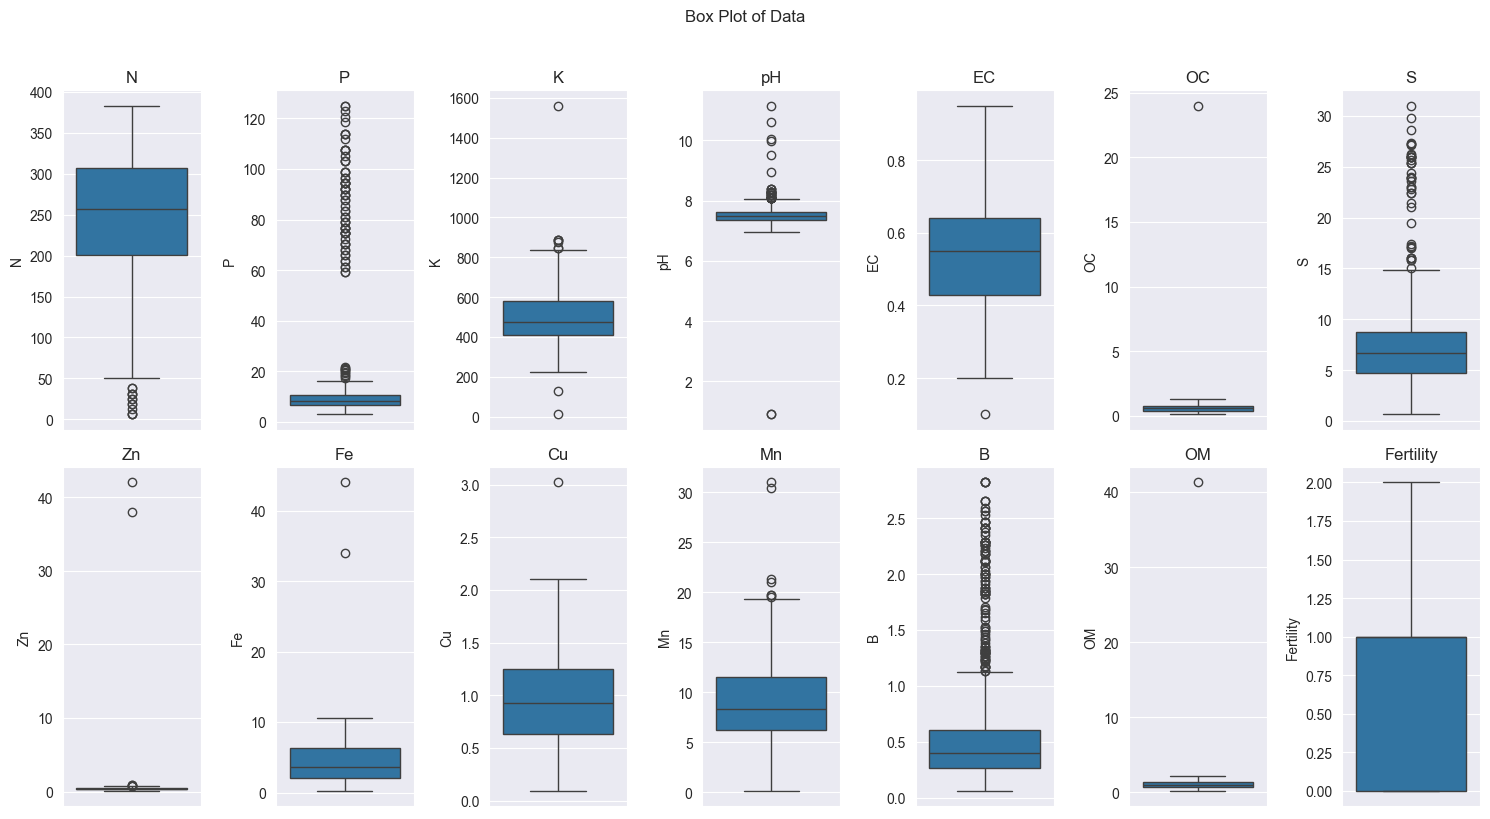

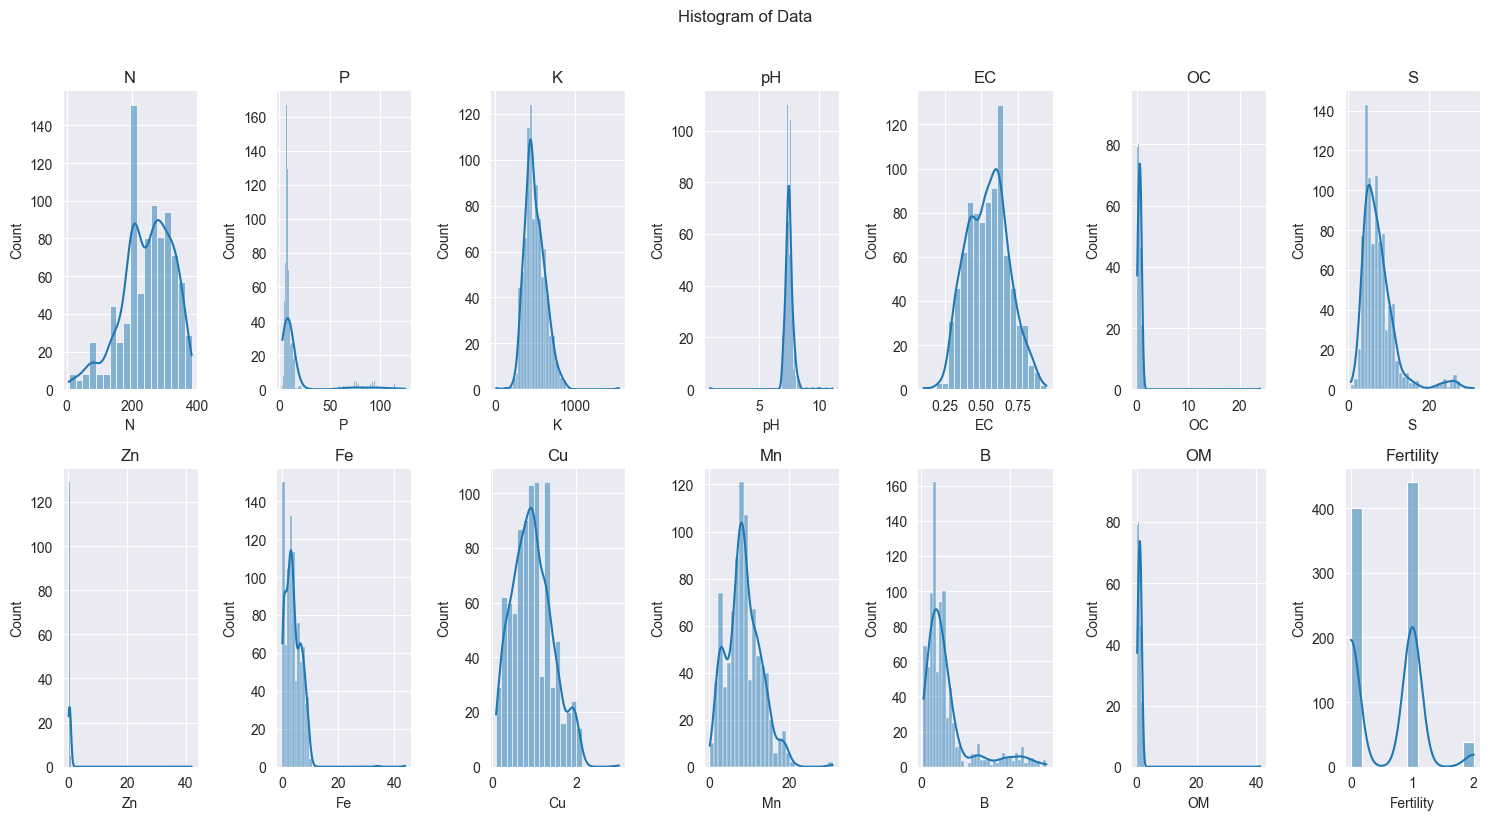

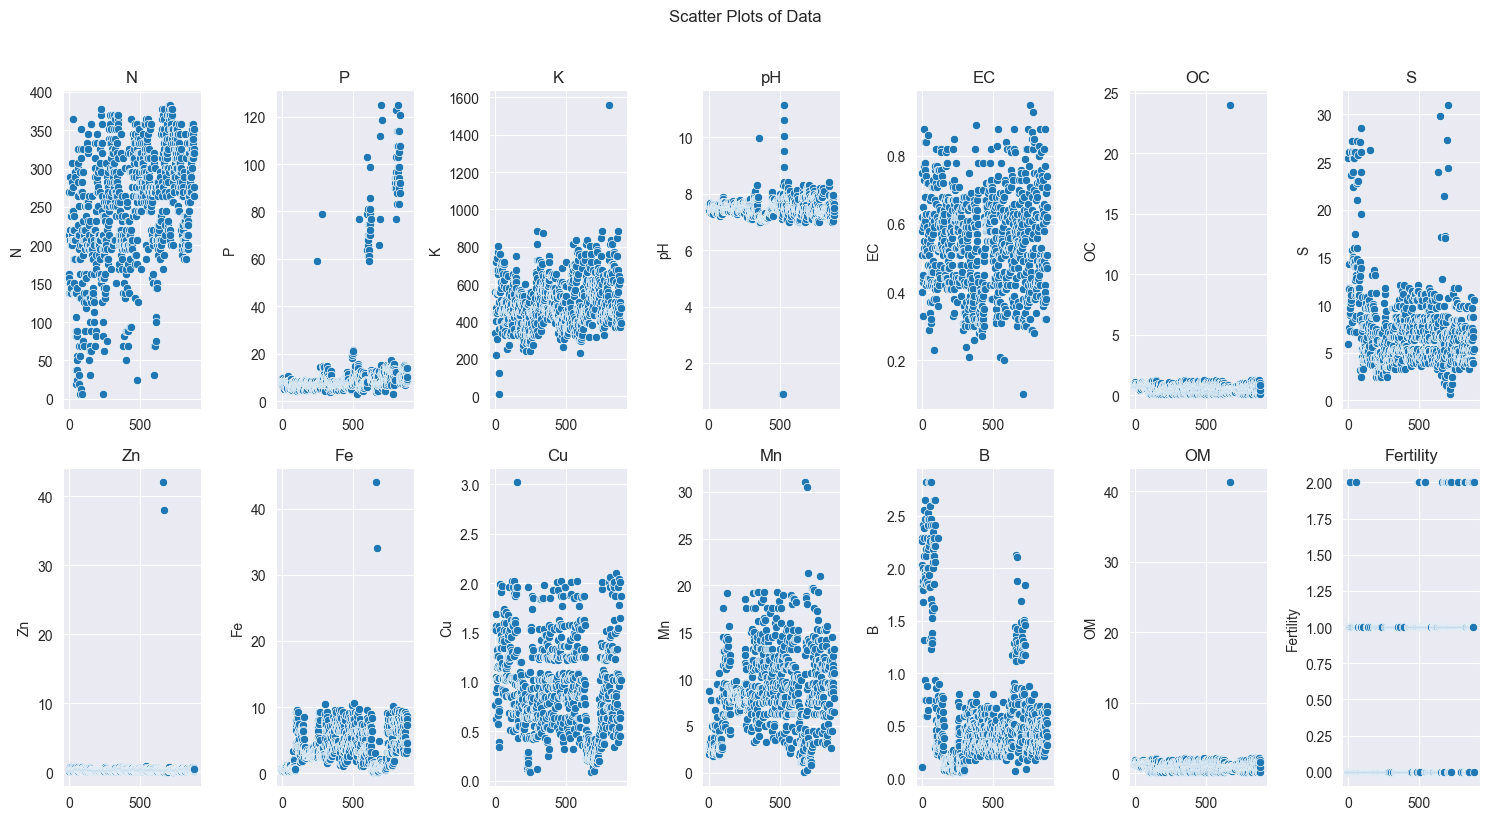

In [24]:
for current_type in PlotType:
    plot(df, plot_type=current_type)

In [25]:
def has_outliers(input_df: pd.DataFrame, *, threshold: float=1.5) -> bool:
    data_description = custom_describe(input_df)
    for column in input_df.columns:
        values = input_df[column]
        q1 = data_description[column]['quantiles']['Q1']
        q3 = data_description[column]['quantiles']['Q3']
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        column_outliers = values[(values < lower_bound) | (values > upper_bound)].index.to_list()

        if column_outliers:
            return True

    return False

def detect_and_treat_outliers(dataframe: pd.DataFrame, *, threshold: float=1.5, show: bool=False) -> pd.DataFrame:
    data_description = custom_describe(dataframe)
    for column in dataframe.columns:
        values = dataframe[column]
        q1 = data_description[column]['quantiles']['Q1']
        q3 = data_description[column]['quantiles']['Q3']
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        column_outliers = values[(values < lower_bound) | (values > upper_bound)].index.to_list()

        if show and column_outliers:
            print(f"Outliers in column '{column}': {column_outliers}")

        values[column_outliers] = values.mean()
        dataframe[column] = values
    return dataframe

def treat_outliers(input_df : pd.DataFrame, show : bool = False) -> pd.DataFrame:
    while True:
        df_without_outliers = detect_and_treat_outliers(input_df, show=show)
        if not has_outliers(df_without_outliers):
            return df_without_outliers
        input_df = df_without_outliers

In [26]:
df = treat_outliers(df)

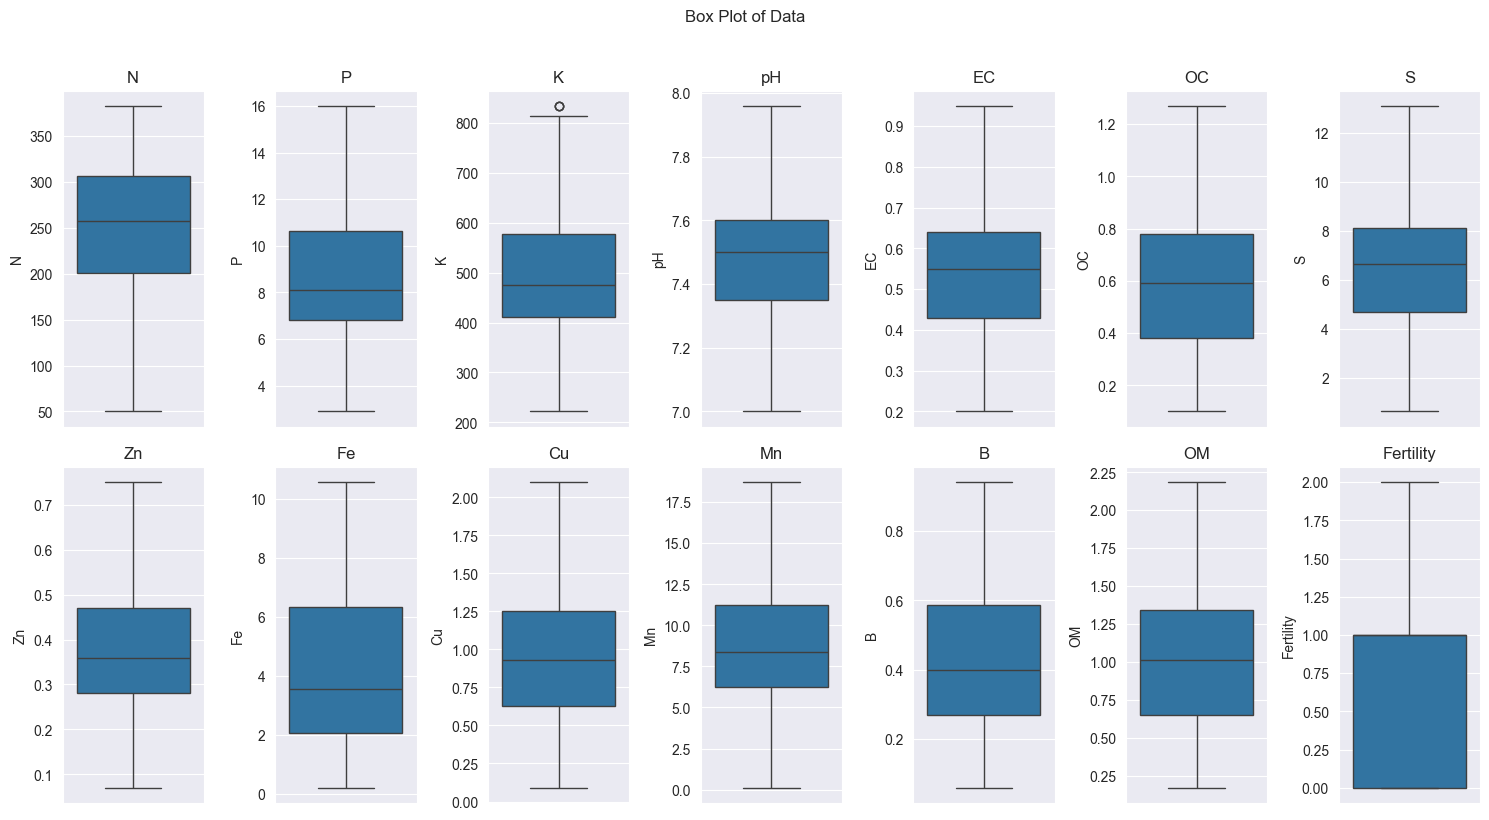

In [27]:
plot(df, plot_type=PlotType.BOX)

# Normalize the data

- Min Max method

In [28]:
def min_max_scaling(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    Perform min-max scaling on each column of a pandas DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: DataFrame with values normalized using min-max scaling.
    """
    copy_df = input_df.copy()
    min_values =  [custom_describe(df)[column]['min'] for column in df.columns]
    max_values =  [custom_describe(df)[column]['max'] for column in df.columns]
    diff = [max_values[i] - min_values[i] for i in range(len(max_values))]
    copy_df = (copy_df - min_values) / diff

    return copy_df

In [29]:
min_max_df = min_max_scaling(df)

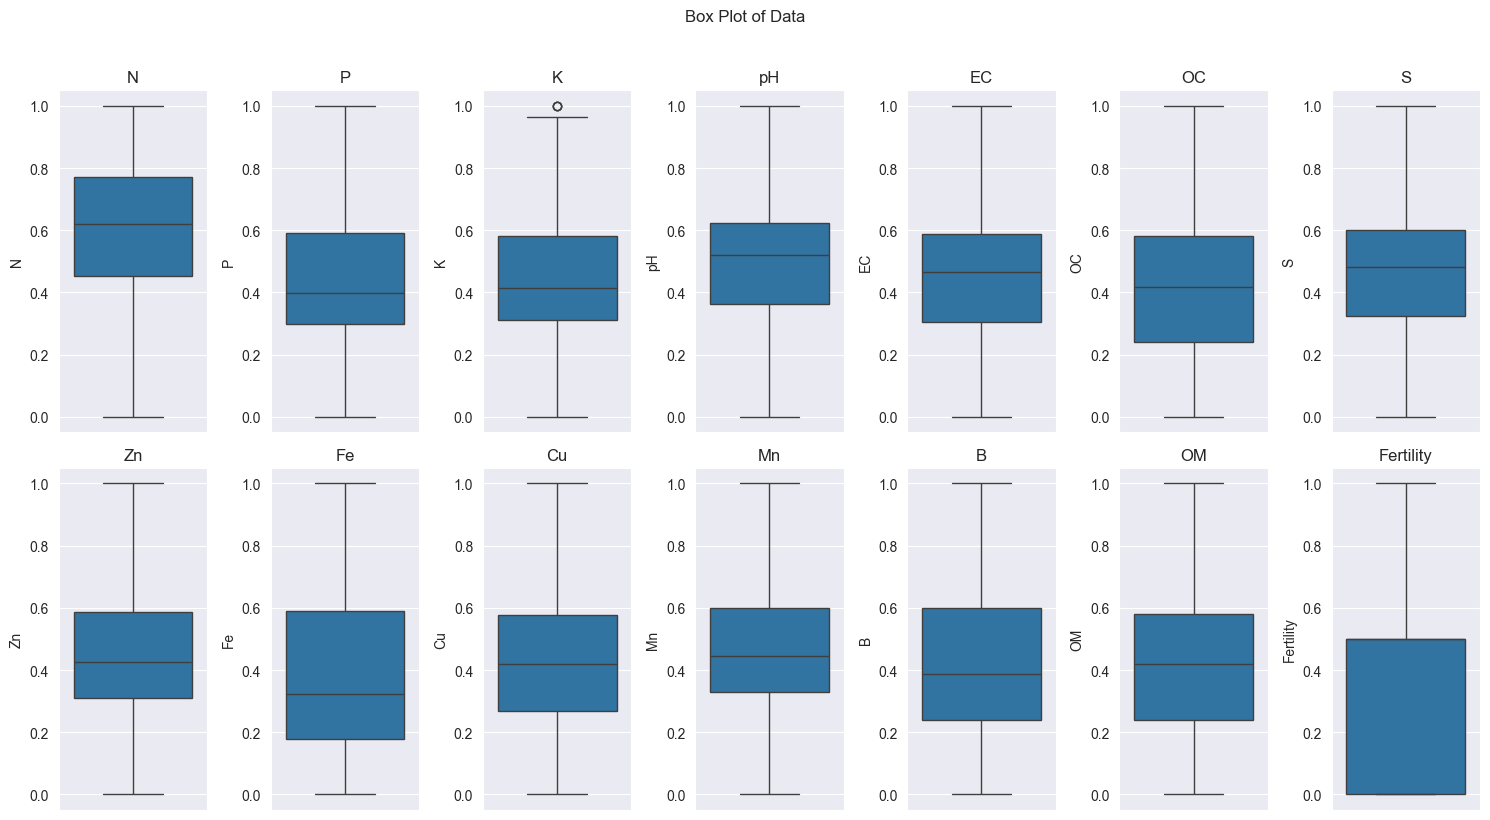

In [30]:
plot(min_max_df, plot_type=PlotType.BOX)

* z-score

In [31]:
def z_score_normalization(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    Perform z-score normalization on each column of a pandas DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: DataFrame with values normalized using z-score normalization.
    """
    copy_df = input_df.copy()
    means =  [custom_describe(df)[column]['mean'] for column in df.columns]
    stds =  [custom_describe(df)[column]['std'] for column in df.columns]
    copy_df = (copy_df - means) / stds

    return copy_df

In [32]:
df_z_score = z_score_normalization(df)

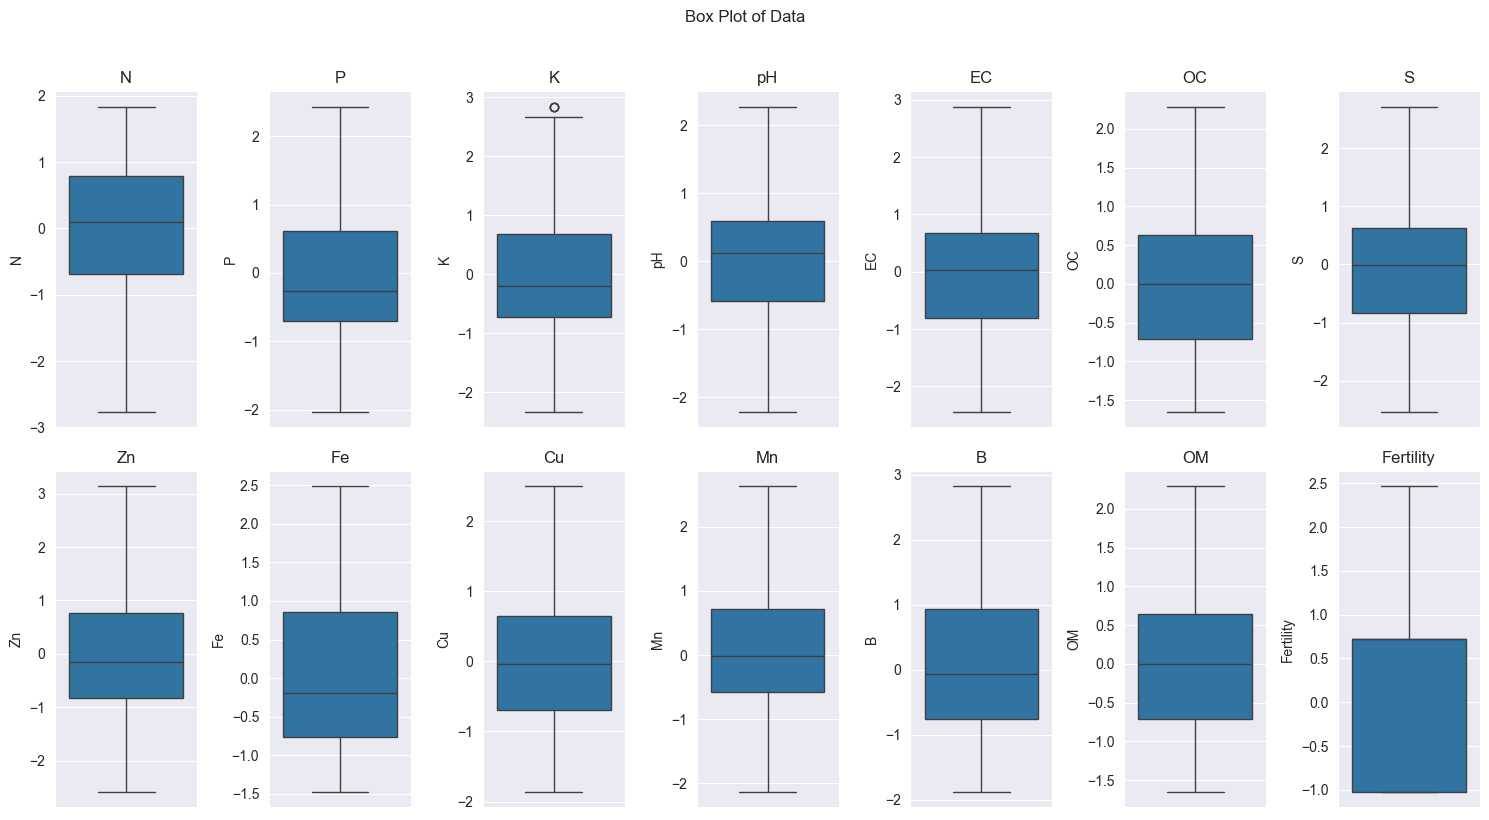

In [33]:
plot(df_z_score, plot_type=PlotType.BOX)

In [34]:
# import mitosheet
# mitosheet.sheet(df)
## THE GUI NOT READY YET